In [ ]:
import Pkg
Pkg.add("Cbc")
Pkg.add("JuMP")

In [ ]:
Pkg.add("GLPK")

In [ ]:
Pkg.add("Gurobi")

In [79]:
Pkg.add("IterTools")

  Resolving package versions...
Updating `C:\Users\aebou\.julia\environments\v1.5\Project.toml`
  [c8e1da08] + IterTools v1.3.0
No Changes to `C:\Users\aebou\.julia\environments\v1.5\Manifest.toml`


In [2]:
using JuMP
using Cbc
using DelimitedFiles
using NBInclude
using GLPK
using Gurobi
const GUROBI_ENV = Gurobi.Env()
const L = 6
using IterTools

# constante epsilon
const ϵ = 0.00001

Academic license - for non-commercial use only - expires 2021-06-28


1.0e-5

# Projet Programmation Mathématiques Avancée et Applications
Hugo Miccinilli, Aboa Bouadou, Florian Jacta, Theo DI PIAZZA | 4GM

## Kidney exchange problem

### Introduction et formulation du problème

On s'intéresse au problème de don croisé de rein.  
**Qu'est ce que le don croisé ?**   
"Il arrive assez souvent qu’une personne soit volontaire pour faire don d’un rein à un proche, parent, conjoint ou ami, mais que le don soit impossible en raison d’une incompatibilité tissulaire avec le receveur. On appellera ces deux personnes la paire A. Une situation identique peut se retrouver ailleurs au sein d’une paire B. Il arrive parfois que le donneur de la paire A soit compatible avec le receveur de la paire B, et vice-versa que le donneur de la paire B soit compatible avec le receveur B. Cette situation – peu courante – peut permettre un « don croisé »." (source France-adot)  

**Représentation mathématique du problème**  
Lorsqu'il y a plusieurs paires patient-donneur, l'opération de greffe est plus compliquée à mettre en place. Mathématiquement, on considère un graphe orienté simple $G = (V,A)$ où V représente l'ensemble des couples patient-donneur $(P_i,D_i)$ et A représente les compatibilités entre entre les différentes paires, c'est à dire $(i,j) \in A$ si le donneur $D_i$ est compatible avec le patient $P_j$. Certains patients sont prioritaires par rapport à d'autres donc on affecte un score $w_{i,j}$ qui caractérise ce fait. Plus le score est elevé, plus le patient impliqué dans l'arc est prioritaire. Ce score peut être vu comme l'utilité d'un arc donné.

**Formulation**  
Comme indiqué dans l'énoncé, on peut associer des patients et des donneurs de sorte à former un cycle dans G. Pour des raisons opérationnelles (les différents greffes dans un cycle doivent se dérouler en même temps), il ne faut pas qu'un cycle soit trop long. Soit L la longueur maximale qu'on peut avoir dans un cycle choisi et soit $\mathcal{C}_L$ l'ensemble des cycles de G tels que $|c| \le L$ pour $c \in \mathcal{C}_L$. On définit $\mathcal{C}_L(i)$ comme l'ensemble des cycles qui contiennent un sommet $i \in V$ et $w_c = \sum \limits_{(i,j) \in c} w_{i,j}$ pour $c \in \mathcal{C}_L$. L'objectif du problème est de choisir l'ensemble des cycles qui permettra de maximiser l'utilité. Certains patients peuvent donc ne pas avoir de donneurs après résolution du problème. 

Le problème peut ainsi se formuler comme suit :  

*Variables*  
$\forall c \in \mathcal{C}_L, z_c = \{0,1\} = 1$ si le cycle c est choisi, 0 sinon  

*Objectif*  
$\sum \limits_{c \in \mathcal{C}_L} w_cz_c$ 

*Contraintes*  
$\sum \limits_{c \in \mathcal{C}_L(i)} z_c \le 1, \forall i \in V$  
$z \in \{0,1\}^{|\mathcal{C}_L|}$


Le problème ayant un très grand nombre de variables, on veut le résoudre en utilisant l'algorithme de branch and price. 

### Initialisation du problème

Avant de coder l'algorithme, on code quelques classes et fonctions qui seront utiles pour initialiser les instances du problème. On explique en détail ces fonctions dans les différents fichiers qu'on a inclut ci-dessous.

In [253]:
@nbinclude("Euristic.ipynb");
@nbinclude("dataparser.ipynb");
@nbinclude("classes.ipynb");
@nbinclude("traitement_noeuds.ipynb");
@nbinclude("branch_and_price.ipynb");
@nbinclude("colonnes.ipynb");
@nbinclude("utiles.ipynb")

Academic license - for non-commercial use only - expires 2021-06-28


  Resolving package versions...
No Changes to `C:\Users\aebou\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\aebou\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\aebou\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\aebou\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\aebou\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\aebou\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\aebou\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\aebou\.julia\environments\v1.5\Manifest.toml`


degreInt (generic function with 1 method)

In [254]:
origine = degreExt(pool);
dest = degreInt(pool);

In [255]:
result = @timed solve_BP()

Current list of nodes to be processed:[1]
 Processing node 1 
Variables set to zero are:Int64[]
Variables set to one are:Int64[]
 Solution réalisable de valeur -0.0 trouvée 
 Cycle avec les arcs [56, 81, 108, 115, 159, 195] ajouté 
 Solution réalisable de valeur 6.0 trouvée 
 Cycle avec les arcs [12, 110] ajouté 
 Cycle avec les arcs [48, 243] ajouté 
 Cycle avec les arcs [73, 182] ajouté 
 Solution réalisable de valeur 10.0 trouvée 
 Cycle avec les arcs [78, 157, 171, 207] ajouté 
 Cycle avec les arcs [79, 154] ajouté 
 Solution réalisable de valeur 12.0 trouvée 
 Cycle avec les arcs [1, 35, 98, 214] ajouté 
 Cycle avec les arcs [17, 179] ajouté 
 Solution réalisable de valeur 14.0 trouvée 
 Cycle avec les arcs [56, 104] ajouté 
 Cycle avec les arcs [78, 171, 204] ajouté 
 Solution réalisable de valeur 17.0 trouvée 
 Cycle avec les arcs [8, 75, 101, 107, 110, 208] ajouté 
 Cycle avec les arcs [57, 81, 128, 199, 203, 220] ajouté 
 Cycle avec les arcs [47, 232, 243] ajouté 
 Cycle avec 

(value = nothing, time = 0.923611801, bytes = 63002012, gctime = 0.0, gcstats = Base.GC_Diff(63002012, 0, 0, 1170444, 1177, 0, 0, 0, 0))

In [55]:
findall(x->x!=0,result[1])
x = result[1]
sol= MetaDiGraph(nv(pool), 0)
for (ind,arc) in enumerate(edges(pool))
    if x[ind]!=0
        add_edge!(sol,src(arc),dst(arc))
    end
end

LoadError: MethodError: no method matching keys(::Nothing)
Closest candidates are:
  keys(!Matched::JuMP.Containers.IndexAnyCartesian, !Matched::JuMP.Containers.SparseAxisArray) at C:\Users\aebou\.julia\packages\JuMP\y5vgk\src\Containers\SparseAxisArray.jl:116
  keys(!Matched::MathOptInterface.Bridges.Constraint.EmptyMap) at C:\Users\aebou\.julia\packages\MathOptInterface\ZJFKw\src\Bridges\Constraint\map.jl:244
  keys(!Matched::Cmd) at process.jl:638
  ...

In [61]:
test =  collect(enumerate(edges(pool)))
print(src(test[6][2]),"\n")
print(dst(test[6][2]),"\n")

3
14


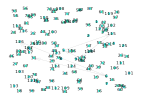

In [50]:
gplot(sol,layout=random_layout,nodelabel = collect(1:nv(sol)))

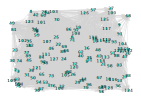

In [51]:
gplot(pool,layout=random_layout,nodelabel = collect(1:nv(pool)))

In [78]:
findall(x->x!=0,result[1])

18-element Array{Int64,1}:
  17
  39
  56
  75
  78
  79
 102
 104
 110
 149
 154
 157
 171
 182
 207
 208
 232
 243

In [275]:
testo = Array{Array{Int,1},1}()
for x in collect(filter(x->length(x)==L-1, simplecycles_hadwick_james(pool)))
    if 14 in x && 30 in x && 25 in x 
        #print(x,"\n")
        push!(testo,x)
    end
end
testo

arr = [1,4,25,30,14]
!(arr  in testo)

false

Le sous problème associé au master s'écrit :
$$max \sum \limits_{a \in A} w_ax_a - \sum \limits_{i \in V} \pi_iy_i \\ s.l.c \sum \limits_{ a \in \delta^+(i)} x_a =   \sum \limits_{ a \in \delta^-(i)} x_a \text{,  } \forall i \in V \\ \sum \limits_{a \in A} x_a \le L \\ \sum \limits_{ a \in \delta^-(i)} x_a = y_i \text{,  } \forall i \in V \\ x \in \{0,1\}^{|A|} \\ y \in \{0,1\}^{|V|}$$

On cherche donc un cycle de longueur maximale égale à L qui minimise le coût réduit.
La fonction permettant d'initialiser le sous-problème est écrite dans le fichier *traitement_noeud*

In [142]:
# Ignore
pi = zeros(Int,17)
pi[4]=1
pi[13]=1
pi[14]=1
pi[15]=1

SP=Model(optimizer_with_attributes(() -> Gurobi.Optimizer(GUROBI_ENV)))
set_optimizer_attribute(SP, "OutputFlag", 0)
    
# Definition x_a = 1 si l'arc a est dans le cycle retenu, 0 sinon
@variable(SP,x[a in 1:ne(pool)],Bin)
    
# Definition de y_i = 1 si paire i dans le cycle retenu, 0 sinon
@variable(SP,y[i in 1:nv(pool)],Bin)
    
    
for vertice in 1:nv(pool)
# Contraintes : les arcs doivent former un cycle
    @constraint(SP,sum(x[a] for a in origine[vertice]) == sum(x[a] for a in dest[vertice]) )
    #Contrainte : y_i vaut 1 ssi il y a un arc qui sort de la paire i qui est choisi dans le cycle
    @constraint(SP, y[vertice] == sum(x[a] for a in origine[vertice]))
end
    
# Contrainte : le cycle doit être de longueur inférieure à L 
@constraint(SP, sum(x[a] for a in 1:ne(pool)) <= L) 

# Contrainte : Il y a au moins un cycle, donc au moins deux sommets choisis
@constraint(SP, sum(y[v] for v in 1:nv(pool)) >= 1)
    
# Objectif : minimiser le coût réduit
@objective(SP,Max,sum( weights[a]*x[a] for a in 1:ne(pool) ) - sum(pi[i]*y[i] for i in 1:nv(pool) ))
    
optimize!(SP)

# If the subproblem is solved to optimality then return its objective value
# and the optimal cycle solution
# Else the pricing problem is infeasible return Inf, []
if JuMP.termination_status(SP)==MOI.OPTIMAL
    print("SOLUTION \nValeur optimale: ",JuMP.objective_value(SP),"\nCycle: ",)
end

SOLUTION 
Valeur optimale: 2.0
Cycle: [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [234]:
sol = zeros(Int,ne(pool)+1)
sol[[6,28,39,43,45,6,40]].=1

7-element view(::Array{Int64,1}, [6, 28, 39, 43, 45, 6, 40]) with eltype Int64:
 1
 1
 1
 1
 1
 1
 1

In [165]:
sol[[1,28,78,79,153,169]].=1
cyc = calcul_cycles(sol)

destination = 4
[2]


1-element Array{Array{Int64,1},1}:
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [176]:
# Transforme la solution x du pricing en un ensemble de cycles
edgeset = collect(enumerate(edges(pool)))
function calcul_cycles(sol)
    cycles = Array{Array{Int,1},1}()
    arcs = findall(x->x!=0,sol)
    edge_added = zeros(Int,ne(pool))
    for a in arcs
        print("Indice de l'arc : $(a)\n")
        if edge_added[a] != 1
            org = src(edgeset[a][2])
            column = zeros(Int,ne(pool));column[a]=1
            dest = dst(edgeset[a][2])
            edge_added[a] = 1
            while(dest != org)
                new_org = findall(x->src(edgeset[x][2]) == dest,arcs)
                dest = dst(edgeset[arcs[new_org][1]][2])
                column[arcs[new_org[1]]] = 1
                edge_added[arcs[new_org[1]]] = 1
            end
            push!(cycles,column)
        end
    end
    return cycles
end

calcul_cycles (generic function with 1 method)

In [177]:
test = calcul_cycles(sol)



Indice de l'arc : 1
Indice de l'arc : 28
Indice de l'arc : 78
Indice de l'arc : 79
Indice de l'arc : 153
Indice de l'arc : 169


2-element Array{Array{Int64,1},1}:
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [157]:
edgeset[]

(39, Edge 4 => 15)

In [106]:
arcs = findall(x->x!=0,sol)


6-element Array{CartesianIndex{2},1}:
 CartesianIndex(1, 1)
 CartesianIndex(1, 28)
 CartesianIndex(1, 78)
 CartesianIndex(1, 79)
 CartesianIndex(1, 153)
 CartesianIndex(1, 169)

In [205]:
# Génération de colonne bidon 
function init_col(pool)
    added_node = zeros(Int,nv(pool))
    edge_selected = zeros(Int,ne(pool))
    for (ind,arc) in enumerate(edges(pool))
        if added_node[src(arc)] ==0 && added_node[dst(arc)] == 0
            edge_selected[ind]=1
            added_node[src(arc)]=1
            added_node[dst(arc)]=1
        end
    end
    return vcat(-1000,edge_selected)
end


init_col (generic function with 1 method)

In [199]:
re = init_col(pool)

249-element Array{Int64,1}:
 -1000
     1
     0
     0
     0
     0
     1
     0
     0
     0
     0
     0
     0
     ⋮
     0
     0
     0
     0
     0
     0
     0
     0
     0
     0
     0
     0

In [201]:
findall(x->x!=0,re)

15-element Array{Int64,1}:
   1
   2
   7
  23
  56
  65
  90
 102
 119
 142
 168
 187
 202
 211
 232

In [197]:
collect(edges(pool))[2]

Edge 1 => 6